# NETFLIX DATASET ANALYSIS PROJECT

## INTRODUCTION
- **Project Overview**: This analysis aims to explore and uncover key insights from the Netflix dataset. The focus will be on understanding content preferences, trends over time, and performing general exploratory data analysis (EDA) to provide a comprehensive view of the dataset's key patterns.

- **Dataset Information**: The dataset used for this analysis is from [Kaggle - Netflix Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows/data), which provides detailed information about Netflix's catalog of shows and movies.

- **Dataset Features**: Title, director info, cast info, country released, Release Year, Rating, etc.
This project will focus on analyzing these features to identify trends and patterns related to content availability, viewer preferences, and content diversity over the years.

In [2]:
#Importing libarires required to perform cleaning operations and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from matplotlib.ticker import MaxNLocator

In [3]:
#importing csv file to a dataframe
netflix_df = pd.read_csv(r'C:\Users\SAGAVERM\Desktop\DA projects\Netflix dataset EDA\netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Exploration and Preprocessing

### **Data Cleaning**:
- Addressed missing values by imputing or removing records where applicable.
- Identified and handled duplicates to ensure data consistency.
- Formatted columns (e.g., adjusting date formats, standardizing text) to ensure proper analysis.

### **Key Visualizations**:
- Visualized the distribution of content across different countries to understand global reach.
- Analyzed trends in content release over the years to identify patterns in production and availability.
- Conducted exploratory data analysis (EDA) to uncover insights from various columns (e.g., type distribution, rating trends, content type) and identify any relationships or anomalies in the data.

In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Handling NULL values
netflix_df['director'].replace(np.nan, 'No Data', inplace= True)
netflix_df['cast'].replace(np.nan, 'No Data', inplace= True)

In [ ]:
#Handling NULL values
netflix_df['country'].replace(np.nan, 'No Data', inplace= True)

In [9]:
#Handling NULL values
netflix_df['date_added'].fillna(pd.NaT)

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [10]:
netflix_df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [11]:
#Handling NULL values
netflix_df['rating']= netflix_df['rating'].replace(np.nan, 'No Data')
netflix_df['duration']= netflix_df['duration'].replace(np.nan, 'No Data')


In [12]:
#shape/size of the dataframe
print(netflix_df.shape)

(8807, 12)


In [13]:
#finding the minimum to maximum release year to understand the timeframe of the dataframe
release_year= netflix_df['release_year'].sort_values(ascending=True, ignore_index= True)
begin_year = release_year[0]
end_year = release_year[release_year.shape[0]-1]
print(f'dataset includes movie release from {begin_year} to {end_year}')

dataset includes movie release from 1925 to 2021


In [14]:
#new DF to analyze trends between the release year and count of movies/tv-shows released
year_df = (netflix_df['release_year'].value_counts()).reset_index()

In [15]:
year_df['Type'] = netflix_df['type']

In [16]:
year_df.head()

,release_year,count,Type
0,2018,1147,Movie
1,2017,1032,TV Show
2,2019,1030,TV Show
3,2020,953,TV Show
4,2016,902,TV Show


### DATA MANIPULATIN AND VISUALIZATION

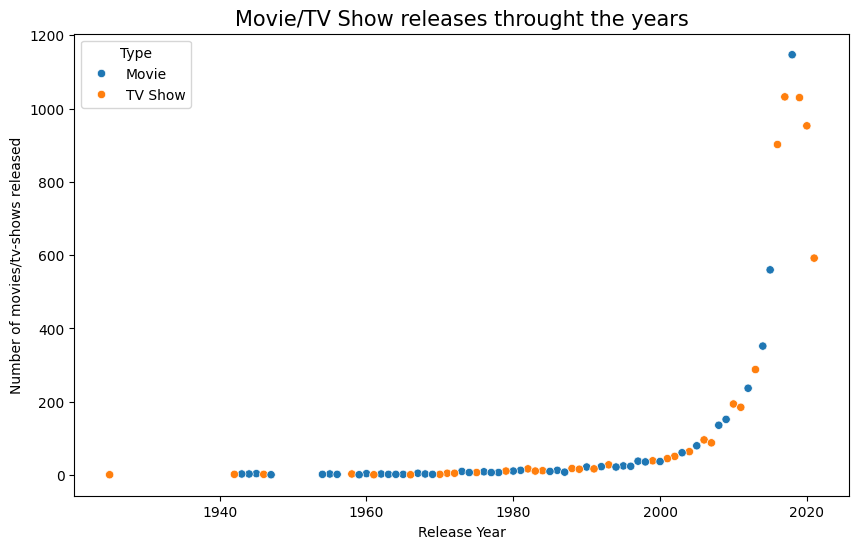

In [150]:
#trend between movies/tv-show released from 1925-2021
plt.figure(figsize= (10,6))
sns.scatterplot(data= year_df, x= 'release_year', y= 'count', hue= 'Type')
plt.title('Movie/TV Show releases throught the years', fontsize= 15)
plt.xlabel('Release Year', fontsize = 10)
plt.ylabel('Number of movies/tv-shows released', fontsize= 10)
plt.show()

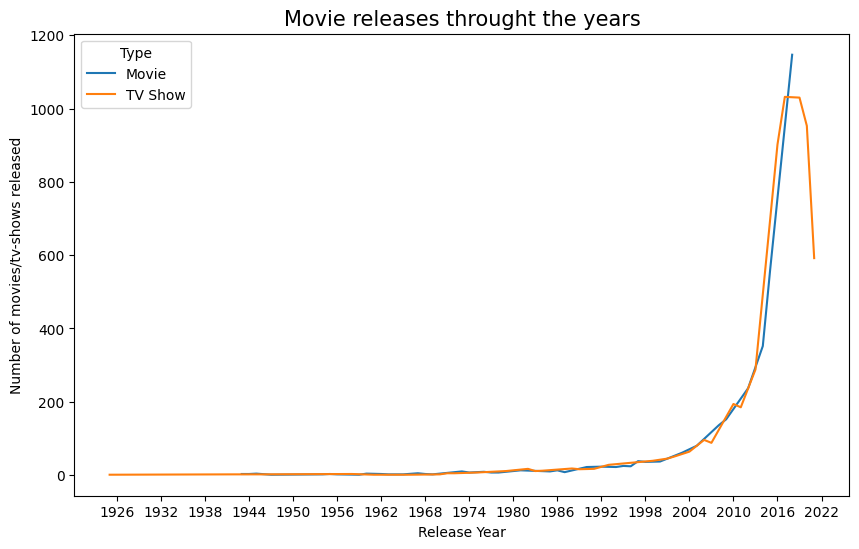

In [149]:
plt.figure(figsize= (10,6))
ax = sns.lineplot(data= year_df, x= 'release_year', y= 'count', hue= 'Type')
plt.title('Movie releases throught the years', fontsize= 15)
plt.xlabel('Release Year', fontsize = 10)
plt.ylabel('Number of movies/tv-shows released', fontsize= 10)
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
#plt.xticks(np.linspace(year_df['release_year'].min(), year_df['release_year'].max(), 16), rotation= 'vertical')
plt.show()

#### **Distribution of Movies and TV-Shows**
- Creating seperate 'movie_show' dataframe, that counts the value of movies and Tv-shows in the dataframe.
- Plotted the dataframe using a countplot in seaborn and a pir chart in plotly to see percentage difference betwwen the values.

In [19]:
movie_show = netflix_df.type.value_counts().reset_index()
movie_show

,type,count
0,Movie,6131
1,TV Show,2676


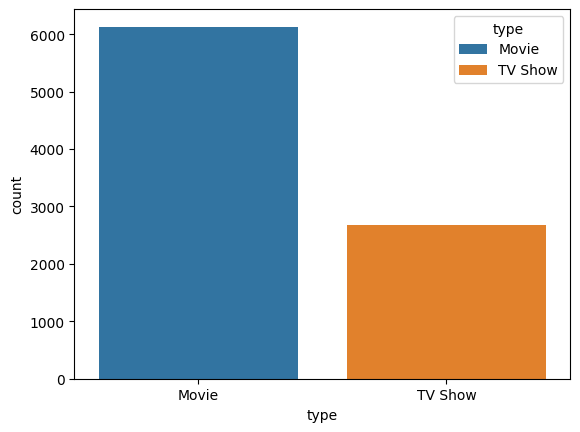

In [20]:
sns.countplot(data= netflix_df, x= 'type', hue= 'type', legend=True)
plt.show()

In [21]:
fig = px.pie(movie_show, names= 'type', values= 'count', title= 'Movie vs TV-Show Distribution')
fig.update_layout(title_x= 0.5)

**Conclusion** : Number of movies released from 1925 to 2021 is greater than the TV-Shows released by almost 40%

In [22]:
#top 10 directors
director_filter = netflix_df[~netflix_df['director'].str.contains('No Data')]
top10_director = director_filter['director'].value_counts().reset_index().head(10)
top10_director

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


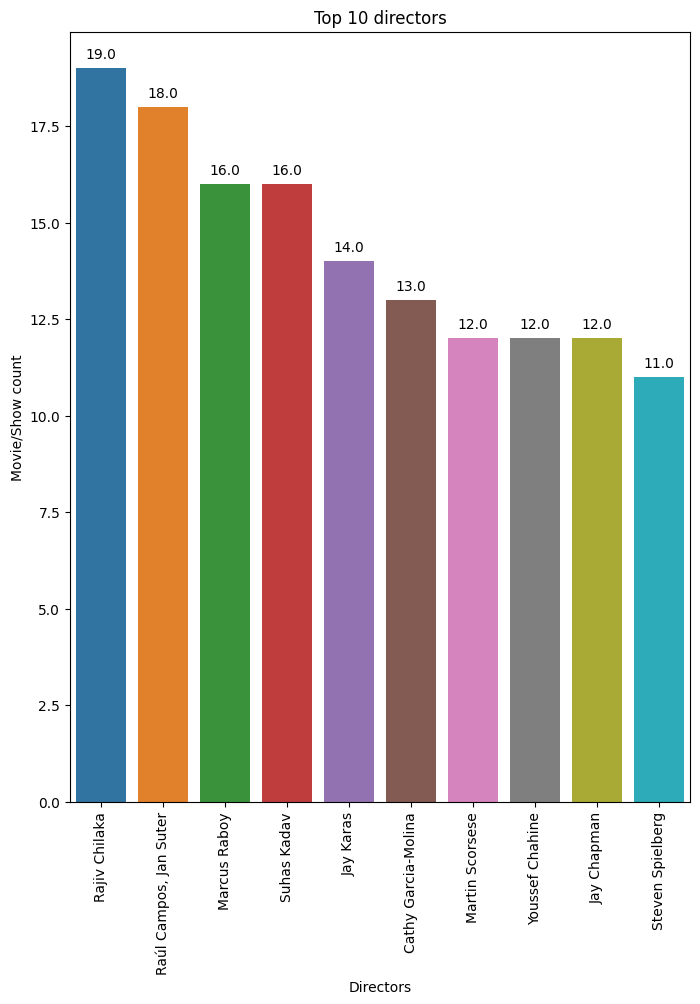

In [23]:
#top 10 director
plt.figure(figsize=(8,10))
ax =sns.barplot(data= top10_director, x= 'director', y= 'count', hue= 'director')
plt.xticks(rotation= 'vertical')
plt.title('Top 10 directors')
plt.ylabel('Movie/Show count')
plt.xlabel('Directors')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom', 
                xytext=(0, 5),  # Offset to move text 5 points above the bar
                textcoords='offset points')
plt.show()

In [24]:
#top 10 cast (actors)
actor_filter= netflix_df[~netflix_df['cast'].str.contains('No Data')]
Top10_actors= actor_filter['cast'].str.split(',').explode().str.strip().value_counts().reset_index().head(10)
Top10_actors

,cast,count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Takahiro Sakurai,32
4,Naseeruddin Shah,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Paresh Rawal,28


In [25]:
#visualizing it
fig = px.bar(Top10_actors, x= 'cast', y= 'count', title= 'Top 10 actors in Movie/ TV-Show', color= 'cast')
fig.update_layout(title_x = 0.5, yaxis= dict(title= 'Number of Movies/TV-Shows', showgrid= False),
                  xaxis= dict(title= 'Actors', showgrid= False),
                  width= 800, height= 600)
fig.update_traces(textposition = 'outside', texttemplate = '%{y}')
fig.show()


In [26]:
# countires
country_filter= netflix_df[~netflix_df['country'].str.contains('No Data')]
countries_netflix= country_filter['country'].str.split(',').explode().str.strip().value_counts().reset_index()
countries_netflix.head()

,country,count
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393


In [27]:
fig= px.pie(countries_netflix.head(10), names= 'country', values= 'count', title= 'Top 10 countries with Movies/TV-Show releases')
fig.update_layout(title_x= 0.5)
fig.show()

#### Movie Duration

In [74]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
#creating a movies_duration series and converting it into a dataframe
movies_duration = np.array(netflix_df[netflix_df['type']=='Movie']['duration']\
                           .str.replace(r'min|No Data','', regex= True)\
                            .str.strip().replace('', np.nan).astype(np.float16))
movies_duration

array([ 90.,  91., 125., ...,  88.,  88., 111.], dtype=float16)

[]

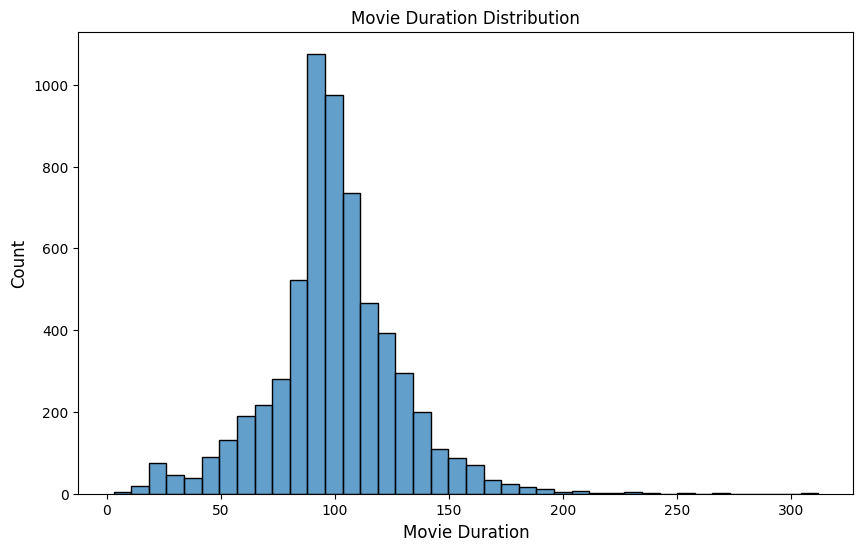

In [73]:
#histogram plot
plt.figure(figsize = (10,6))
sns.histplot(x= movies_duration, edgecolor= 'black', bins= 40, alpha= 0.7)
plt.xticks(fontsize = 10)
plt.xlabel('Movie Duration', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Movie Duration Distribution')
plt.plot()

In [83]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


TV Shows with most seasons


In [108]:
TVshows = netflix_df[netflix_df['type']== 'TV Show'][['title', 'duration']]
TVshows.head()

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season


In [ ]:
TVshows['duration'] = TVshows['duration'].str.replace(r'Seasons|Season','', regex= True).str.strip()
TVshows.head()

,title,duration
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1


In [123]:
TVshows.sort_values(by= 'duration', ascending= False, inplace=True)
TVshows.reset_index(inplace= True, drop= True)
TVshows.drop(columns= 'index', axis= 1, inplace= True)
TVshows.head()

,title,duration
0,Still Game,9
1,Club Friday The Series 6,9
2,Saved by the Bell,9
3,Call the Midwife,9
4,The Great British Baking Show,9


In [137]:
TVshows['duration'] = TVshows['duration'].astype('int')
TVshows.dtypes

title       object
duration     int64
dtype: object

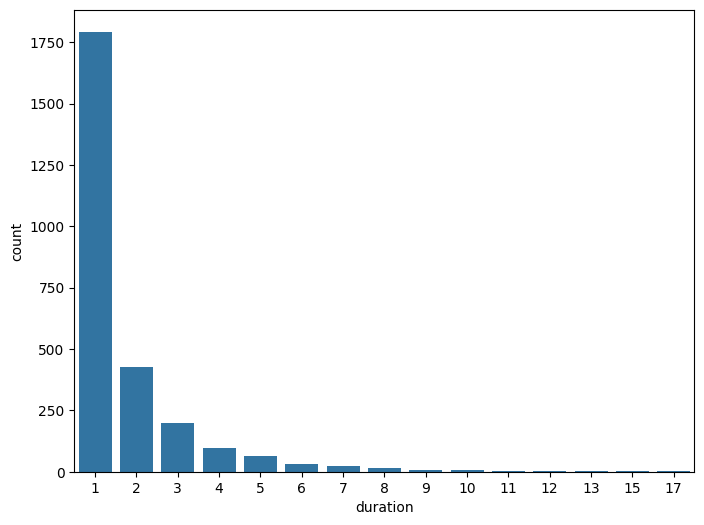

In [ ]:
plt.figure(figsize = (8,6))
ax= sns.countplot(data= TVshows, x= 'duration')
plt.show()

In [147]:
fig= px.histogram(data_frame= TVshows, x= 'duration', title= 'Count of seasons', histfunc= 'count')
fig.update_traces(marker=dict(line=dict(width=2, color='black')))

In [148]:
netflix_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
